<a href="https://colab.research.google.com/github/NMKUNT/MohanKrishna_INFO5502_Spring2022/blob/main/INFO_5502_Final_Exam_Spring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 240 points in total)

<span style='background:yellow'>**Question 1 (40 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")
print(data.head(10))
print(data.info())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
5  1969      1  3.0      M    4994
6  1969      1  4.0      F    4440
7  1969      1  4.0      M    4520
8  1969      1  5.0      F    4192
9  1969      1  5.0      M    4198
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None


In [ ]:
percentiles = np.percentile(data['births'], [25, 50, 75]) # let us take every 25th percentiles, so that we can find mean and standard deviation
mean, std_dev = percentiles[1], 0.74 * (percentiles[2] - percentiles[0]) # we are taking 50th percentile as mean, and difference between 75th and 25th times 0.74 as the standard deviation 
births = data.query('(births > @mean - 5 * @std_dev) & (births < @mean + 5 * @std_dev)') # restricting to 5 standard deviations

births['day'] = births['day'].astype(int) # converting data type to int as it is in float. And the day is always an integer.

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')  # creating an index in the yyyymmdd format.
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

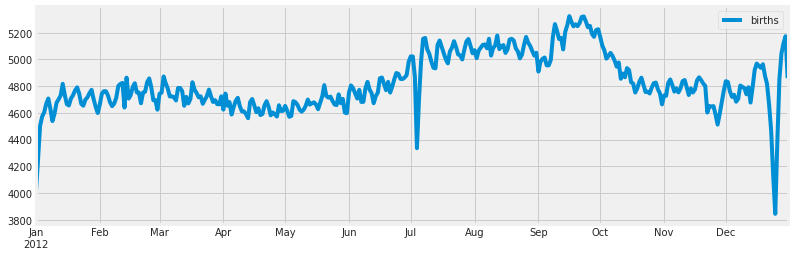

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

<span style='background:yellow'>**Question 2 (40 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 


In [ ]:
import numpy as np

confusion_matrix = [[157,46,25,22,15,3],
              [28,151,45,18,1,6],
              [11,38,135,14,3,7],
              [11,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,16]]

c = np.array(confusion_matrix)


for i in range(len(c)):
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = c[i,i]
    FP = c[i,:].sum() - TP
    FN = c[:,i].sum() - TP
    TN = c.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/c.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)
    
    print(f'The accuracy of class{i} is {accuracy}')
    print(f'The precision of class{i} is {precision}')
    print(f'The recall of class{i} is {recall}')
    print(f'The F1-Score of class{i} is {f1_score}')
    print()

The accuracy of class0 is 0.8139303482587065
The precision of class0 is 0.585820895522388
The recall of class0 is 0.6738197424892703
The F1-Score of class0 is 0.626746506986028

The accuracy of class1 is 0.7850746268656716
The precision of class1 is 0.606425702811245
The recall of class1 is 0.5613382899628253
The F1-Score of class1 is 0.583011583011583

The accuracy of class2 is 0.8199004975124378
The precision of class2 is 0.6490384615384616
The recall of class2 is 0.5555555555555556
The F1-Score of class2 is 0.598669623059867

The accuracy of class3 is 0.8805970149253731
The precision of class3 is 0.5645161290322581
The recall of class3 is 0.5147058823529411
The F1-Score of class3 is 0.5384615384615384

The accuracy of class4 is 0.9213930348258706
The precision of class4 is 0.5333333333333333
The recall of class4 is 0.6511627906976745
The F1-Score of class4 is 0.5863874345549738

The accuracy of class5 is 0.9432835820895522
The precision of class5 is 0.3137254901960784
The recall of 

<span style='background:yellow'>**Question 3 (100 pt, each sub-question is 10 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in the training data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.

(6) Repeat Question 5 to clean the testing data.

(7) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?

(8) Randomly sample 100 pairs of sequences from both classes and calculate the median cosine similarity.

(9) Refer back to Question 2, parse the data into a length of 5, 10, 15, and 20. Clean the data from each class using Question 5. For each sequence length, calculate the median cosine similarity of 100 random pairs of sequences from both classes. 

(10) Plot a line chart to visualize how the median cosine similarities vary through different sequence lengths from 5 to 25.


In [ ]:
normalSet = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int")
intrusionSet = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int")



In [ ]:
print(normalSet.any().isna())
print(intrusionSet.any().isna())

167 90    False
dtype: bool
167 90    False
dtype: bool



From the above result, we can see that ther are no null values in both the datasets

In [ ]:
print(normalSet[normalSet.duplicated()])
print(intrusionSet[intrusionSet.duplicated()])

      167 90
1    167 125
6      167 5
8     167 90
9     167 90
10    167 90
..       ...
534   2669 6
535   2669 6
536   2669 6
537   2669 6
538   2669 6

[488 rows x 1 columns]
       167 90
1     167 125
6       167 5
8      167 90
9      167 90
10     167 90
...       ...
8364   4470 6
8365   4470 6
8366   4470 6
8367   4470 6
8368   4470 6

[8017 rows x 1 columns]


We can see that there are duplicates in both the datasets

<span style='background:yellow'>**Question 4 (60 pt, each sub-question is 20 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?


(3) Draw the A/B testing related visualizations.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv")

Test Statistics stat:  nan
Z-critical:  1.959963984540054
P_value:  nan
Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


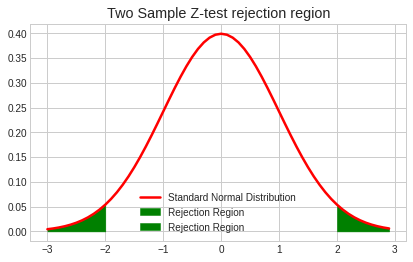

In [78]:
import pandas as pd
import numpy as np
from scipy.stats import norm

group_a = data[(data['incentivized'] == "NominalGift") | (data['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
group_b = data[(data['incentivized'] == "NoIncentive") | (data['incentivized'] == "NonNominalGift") | (data['incentivized'] == "VendorReferred")]['OverAllRating']

N_con = group_a.shape[0]
N_exp = group_b.shape[0]

# Significance Level
alpha = 0.05


# con is control exp is experimental

mean_con = np.mean(group_a)
mean_exp = np.mean(group_b)

#changing the datatype
group_a = group_a.astype('int')
group_b = group_b.astype('int')

#variance
variance_con = np.var(group_a)
variance_exp = np.var(group_b)

# Pooled Variance
pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

# Test statistics
T = (mean_con-mean_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(T)*2

# Z-critical value
Z_crit  = norm.ppf(1-alpha/2)

# Margin of error
m = Z_crit*pooled_variance

# Confidence Interval
CI = [(mean_con - mean_exp) - m, (mean_con - mean_exp) + m]


print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'Red',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Rejection Region',color ='g' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Rejection Region',color ='g' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()  